In [1]:
from pdkit import GaitTimeSeries, GaitProcessor
from pdkit.utils import plot_bellman_segmentation

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pylab as plt

In [4]:
data = '/src/data/pdkit/physics_phone_data/wtwtwlpfd.csv'

In [5]:
ts = GaitTimeSeries.load_data(data, format_file='physics')

Sampling rate is 197.49056603773585 Hz
Sampling rate is 197.49056603773585 Hz


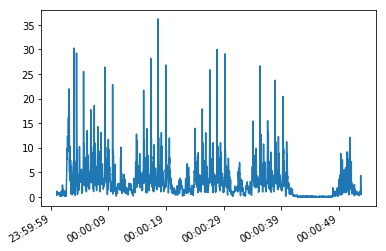

In [6]:
ts.mag_sum_acc.plot()

In [7]:
gp = GaitProcessor(sampling_frequency=50.0)

Sampling rate is 49.83018867924528 Hz


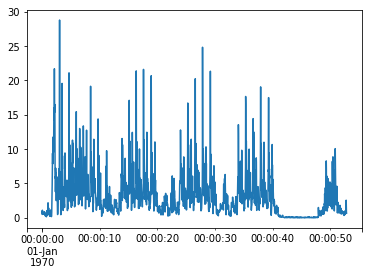

In [8]:
rts = gp.resample_signal(ts)
rts.mag_sum_acc.plot()

In [9]:
frts = gp.filter_data_frame(rts)

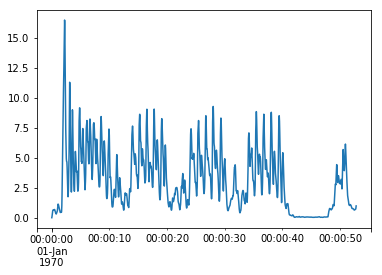

In [10]:
frts.mag_sum_acc.plot()

In [11]:
gp.axis = 'mag_sum_acc'

In [12]:
peak, promi, segments = gp.bellman_segmentation(frts, 10)

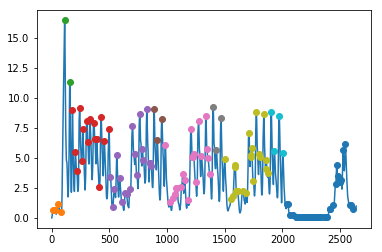

In [13]:
plot_bellman_segmentation(frts.mag_sum_acc.values, peak, segments)

In [14]:
dd = gp.filter_signal(rts)

In [15]:
gp.axis = 'filtered_signal'

In [16]:
pk, prm, idx = gp.bellman_segmentation(dd, 10)

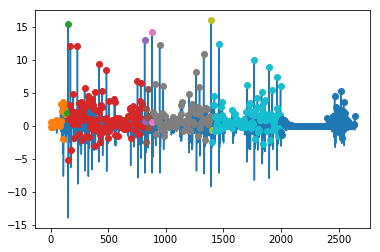

In [17]:
plot_bellman_segmentation(dd.filtered_signal.values, pk, idx)

In [18]:
from sklearn.cluster import Birch

In [22]:
cluster_fn = Birch(n_clusters=2)

In [23]:
peak, promi, segments = gp.sklearn_segmentation(dd, cluster_fn=cluster_fn)

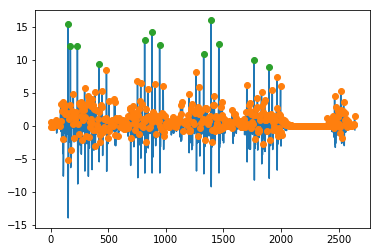

In [24]:
plot_bellman_segmentation(dd.filtered_signal.values, peak, segments)